In [1]:
from database_load import load_hadist_data, load_quran_data

hadist_df = load_hadist_data()
quran_ayat_df, quran_surah_df = load_quran_data()

In [ ]:
hadist_df.info()
quran_ayat_df.info()
quran_surah_df.info()

In [ ]:
hadist_df.head()

In [ ]:
hadist_df.tail()

In [2]:
from database_cleaning import preprocess_hadist, preprocess_quran

hadist_df = preprocess_hadist(hadist_df)
quran_df = preprocess_quran(quran_ayat_df, quran_surah_df)

In [ ]:
hadist_df.info()
hadist_df.head()

In [ ]:
quran_df.info()
quran_df.head()

In [3]:
import pandas as pd

# Gabungkan data hadist dan quran
combined_df = pd.concat([
    hadist_df[['terjemah_clean', 'kitab_clean']].rename(columns={'terjemah_clean': 'text', 'kitab_clean': 'source'}),
    quran_df[['Terjemahan_clean', 'Surah_Ayat']].rename(columns={'Terjemahan_clean': 'text', 'Surah_Ayat': 'source'})
])
combined_df = combined_df.reset_index(drop=True)

def chunk_text(text, max_length=512, stride=256):
    words = text.split()
    chunks = []
    for i in range(0, len(words), stride):
        chunk = ' '.join(words[i:i+max_length])
        chunks.append(chunk)
    return chunks

combined_df['text_chunks'] = combined_df['text'].apply(lambda x: chunk_text(x))

In [4]:
combined_df.head()

,text,source,text_chunks
0,telah menceritakan kepada kami abdullah bin nu...,musnad ahmad,[telah menceritakan kepada kami abdullah bin n...
1,telah menceritakan kepada kami waki' dia berka...,musnad ahmad,[telah menceritakan kepada kami waki' dia berk...
2,telah menceritakan kepada kami 'amru bin muham...,musnad ahmad,[telah menceritakan kepada kami 'amru bin muha...
3,telah menceritakan kepada kami waki' dia berka...,musnad ahmad,[telah menceritakan kepada kami waki' dia berk...
4,telah menceritakan kepada kami muhammad bin ja...,musnad ahmad,[telah menceritakan kepada kami muhammad bin j...


In [5]:
print("Sampel data hadist setelah cleaning:")
print(hadist_df[['arab_clean', 'terjemah_clean', 'kitab_clean']].head())

Sampel data hadist setelah cleaning:
                                          arab_clean  \
0  حَدَّثَنَا عَبْدُ اللَّهِ بْنُ نُمَيْرٍ قَالَ ...   
1  حَدَّثَنَا وَكِيعٌ قَالَ حَدَّثَنَا مِسْعَرٌ و...   
2  حَدَّثَنَا عَمْرُو بْنُ مُحَمَّدٍ أَبُو سَعِيد...   
3  حَدَّثَنَا وَكِيعٌ قَالَ قَالَ إِسْرَائِيلُ قَ...   
4  حَدَّثَنَا مُحَمَّدُ بْنُ جَعْفَرٍ قَالَ حَدَّ...   

                                      terjemah_clean   kitab_clean  
0  telah menceritakan kepada kami abdullah bin nu...  musnad ahmad  
1  telah menceritakan kepada kami waki' dia berka...  musnad ahmad  
2  telah menceritakan kepada kami 'amru bin muham...  musnad ahmad  
3  telah menceritakan kepada kami waki' dia berka...  musnad ahmad  
4  telah menceritakan kepada kami muhammad bin ja...  musnad ahmad  


In [9]:
print("\nSampel data Al-Qur'an setelah cleaning:")
print(quran_df[['Arab_clean', 'Terjemahan_clean', 'Surah_Ayat']].head())


Sampel data Al-Qur'an setelah cleaning:
                                 Arab_clean  \
0    بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ   
1     الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ   
2                   الرَّحْمَٰنِ الرَّحِيمِ   
3                   مَالِكِ يَوْمِ الدِّينِ   
4  إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ   

                                    Terjemahan_clean        Surah_Ayat  
0  dengan menyebut nama allah yang maha pemurah l...  Al Fatihah (1:1)  
1        segala puji bagi allah, tuhan semesta alam.  Al Fatihah (1:2)  
2                  maha pemurah lagi maha penyayang.  Al Fatihah (1:3)  
3                 yang menguasai di hari pembalasan.  Al Fatihah (1:4)  
4  hanya engkaulah yang kami sembah, dan hanya ke...  Al Fatihah (1:5)  


In [13]:
print("\nJumlah data setelah penggabungan:", len(combined_df))
print(combined_df.head())


Jumlah data setelah penggabungan: 70205
                                                text        source  \
0  telah menceritakan kepada kami abdullah bin nu...  musnad ahmad   
1  telah menceritakan kepada kami waki' dia berka...  musnad ahmad   
2  telah menceritakan kepada kami 'amru bin muham...  musnad ahmad   
3  telah menceritakan kepada kami waki' dia berka...  musnad ahmad   
4  telah menceritakan kepada kami muhammad bin ja...  musnad ahmad   

                                         text_chunks  
0  [telah menceritakan kepada kami abdullah bin n...  
1  [telah menceritakan kepada kami waki' dia berk...  
2  [telah menceritakan kepada kami 'amru bin muha...  
3  [telah menceritakan kepada kami waki' dia berk...  
4  [telah menceritakan kepada kami muhammad bin j...  


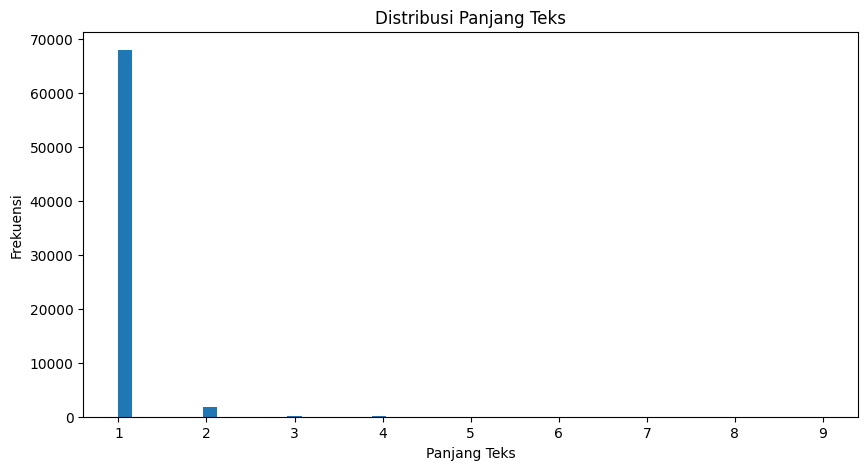

Statistik panjang teks:
count    70205.000000
mean         1.040610
std          0.276396
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: text_length, dtype: float64


In [6]:
import matplotlib.pyplot as plt

combined_df['text_length'] = combined_df['text_chunks'].apply(len)
plt.figure(figsize=(10, 5))
plt.hist(combined_df['text_length'], bins=50)
plt.title('Distribusi Panjang Teks')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.show()

print("Statistik panjang teks:")
print(combined_df['text_length'].describe())

Persiapan model

In [7]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
model = AutoModel.from_pretrained("indolem/indobert-base-uncased")

Membuat dataset dan dataloader

In [8]:
import torch
from torch.utils.data import DataLoader
from qa_model import IslamicDataset, IslamicQAModel

qa_model = IslamicQAModel(model)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
qa_model.to(device)

# Buat dataset
dataset = IslamicDataset(combined_df['text_chunks'].tolist(), combined_df['source'].tolist(), tokenizer)

# Bagi data menjadi train dan validation
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(dataset, test_size=0.1, random_state=42)

# Buat dataloader
from torch.optim import AdamW

batch_size = 8
accumulation_steps = 4
num_epochs = 3
learning_rate = 2e-5
weight_decay = 0.01

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_data, batch_size=batch_size, num_workers=4)

optimizer = AdamW(qa_model.parameters(), lr=learning_rate, weight_decay=weight_decay)


Fine-tunning Model

In [9]:
from train_evaluate import train_epoch, evaluate
import torch

patience = 3
best_val_loss = float('inf')
early_stopping_counter = 0
best_model = None

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
   
    # Training
    train_loss = train_epoch(qa_model, train_dataloader, optimizer, device, accumulation_steps)
    print(f"Average train loss: {train_loss:.4f}")
   
    # Validation
    val_metrics = evaluate(qa_model, val_dataloader, device)
    print(f"Validation loss: {val_metrics['loss']:.4f}")
    print(f"Retrieval accuracy: {val_metrics['retrieval_accuracy']:.4f}")
    print(f"QA F1-score: {val_metrics['qa_f1']:.4f}")
   
    # Early stopping check
    if val_metrics['loss'] < best_val_loss:
        best_val_loss = val_metrics['loss']
        best_model = qa_model.state_dict()
        early_stopping_counter = 0
        # Simpan model terbaik
        torch.save(best_model, f'models/indobert_finetuned_islamic_qa_model_epoch_{epoch+1}.pth')
        print(f"Best model saved for epoch {epoch+1}")
    else:
        early_stopping_counter += 1
   
    if early_stopping_counter >= patience:
        print(f"Early stopping triggered after {epoch+1} epochs")
        break

# Simpan model final
torch.save(qa_model.state_dict(), 'models/indobert_finetuned_islamic_qa_model_final.pth')
print("Final model saved.")

Epoch 1/3


Training: 100%|██████████| 8219/8219 [55:22:17<00:00, 24.25s/it]   


Average train loss: 0.0705


Evaluating: 100%|██████████| 914/914 [3:00:06<00:00, 11.82s/it]  


Validation loss: 0.0001
Retrieval accuracy: 1.0000
QA F1-score: 1.0000
Best model saved for epoch 1
Epoch 2/3


Training: 100%|██████████| 8219/8219 [57:42:54<00:00, 25.28s/it]   


Average train loss: 0.0002


Evaluating: 100%|██████████| 914/914 [4:09:18<00:00, 16.37s/it]  


Validation loss: 0.0000
Retrieval accuracy: 1.0000
QA F1-score: 1.0000
Best model saved for epoch 2
Epoch 3/3


Training: 100%|██████████| 8219/8219 [67:31:03<00:00, 29.57s/it]   


Average train loss: 0.0001


Evaluating: 100%|██████████| 914/914 [4:24:33<00:00, 17.37s/it]  


Validation loss: 0.0000
Retrieval accuracy: 1.0000
QA F1-score: 1.0000
Best model saved for epoch 3
Final model saved.


In [19]:
from train_evaluate import train_epoch, evaluate

best_val_metrics = {'loss': float('inf'), 'retrieval_accuracy': 0, 'qa_f1': 0}

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    train_loss = train_epoch(qa_model, train_dataloader, optimizer, device, accumulation_steps)
    val_metrics = evaluate(qa_model, val_dataloader, device)
    
    print(f"Train loss: {train_loss:.4f}")
    print(f"Validation loss: {val_metrics['loss']:.4f}")
    print(f"Retrieval accuracy: {val_metrics['retrieval_accuracy']:.4f}")
    print(f"QA F1-score: {val_metrics['qa_f1']:.4f}")
    
    # Simpan model jika performa meningkat
    if val_metrics['loss'] < best_val_metrics['loss']:
        best_val_metrics = val_metrics
        model_save_path = 'models/indobert_finetuned_islamic_qa_model.pth'
        torch.save(qa_model.state_dict(), model_save_path)
        print(f"Model disimpan di {model_save_path}")
    
    print()

Epoch 1/3


Training:   0%|          | 0/7898 [00:00<?, ?it/s]

Evaluating: 100%|██████████| 878/878 [2:51:08<00:00, 11.70s/it]  


Train loss: 0.0608
Validation loss: 0.0001
Retrieval accuracy: 1.0000
QA F1-score: 1.0000
Model disimpan di models/indobert_finetuned_islamic_qa_model.pth

Epoch 2/3


Training:  14%|█▍        | 1111/7898 [7:43:30<54:00:45, 28.65s/it]

test model

In [ ]:
from qna import answer_question

# Contoh penggunaan
question = "Apa hukum puasa Ramadhan?"
answer = answer_question(question, qa_model, tokenizer, dataset)
print(f"Pertanyaan: {question}")
print(f"Jawaban: {answer}")

uji coba

In [8]:
def format_hadist_data(df):
  formatted_data = []
  for _, row in df.iterrows():
    formatted_data.append({
      'source': 'Hadist',
      'reference': f"{row['kitab_clean']} - {row['id']}",
      'arabic': row['arab_clean'],
      'translation': row['terjemah_clean']
    })
  return formatted_data

def format_quran_data(df):
  formatted_data = []
  for _, row in df.iterrows():
    formatted_data.append({
      'source': 'Al-Quran',
      'reference': row['Surah_Ayat'],
      'arabic': row['Arab_clean'],
      'translation': row['Terjemahan_clean']
    })
  return formatted_data

hadist_data = format_hadist_data(hadist_df)
quran_data = format_quran_data(quran_df)

all_data = hadist_data + quran_data

In [9]:
print(quran_data)

[{'source': 'Al-Quran', 'reference': 'Al Fatihah (1:1)', 'arabic': 'بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ', 'translation': 'dengan menyebut nama allah yang maha pemurah lagi maha penyayang.'}, {'source': 'Al-Quran', 'reference': 'Al Fatihah (1:2)', 'arabic': 'الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ', 'translation': 'segala puji bagi allah, tuhan semesta alam.'}, {'source': 'Al-Quran', 'reference': 'Al Fatihah (1:3)', 'arabic': 'الرَّحْمَٰنِ الرَّحِيمِ', 'translation': 'maha pemurah lagi maha penyayang.'}, {'source': 'Al-Quran', 'reference': 'Al Fatihah (1:4)', 'arabic': 'مَالِكِ يَوْمِ الدِّينِ', 'translation': 'yang menguasai di hari pembalasan.'}, {'source': 'Al-Quran', 'reference': 'Al Fatihah (1:5)', 'arabic': 'إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ', 'translation': 'hanya engkaulah yang kami sembah, dan hanya kepada engkaulah kami meminta pertolongan.'}, {'source': 'Al-Quran', 'reference': 'Al Fatihah (1:6)', 'arabic': 'اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ', 'translation': 'tunjuki

In [ ]:
def qa_pairs(data):
	qa_pairs = []
	for item in data:
		
		questions_ref = [
			f"Apa isi dari {item['source']} {item['reference']}?",
			f"Apa maksud dari {item['source']} {item['reference']}?",
			f"Apa yang dikatakan dalam {item['source']} {item['reference']}?",
			f"Apa arti dari {item['source']} {item['reference']}?",
			f"Apa perbedaan dari {item['source']} {item['reference']}?",
			f"Apa tujuan dari {item['source']} {item['reference']}?",
			f"Apa konteks dari {item['source']} {item['reference']}?",
			f"Apa yang dijelaskan dalam {item['source']} {item['reference']}?",
			f"Apa relevansi dari {item['source']} {item['reference']}?",
			f"Siapa yang disebut dalam {item['source']} {item['reference']}?",
			f"Siapa orang yang disebut dalam {item['source']} {item['reference']}?",
			f"Siapa yang terlibat dalam {item['source']} {item['reference']}?",
			f"Siapa yang berbicara dalam {item['source']} {item['reference']}?",
			f"Siapa yang menjadi tokoh utama dalam {item['source']} {item['reference']}?",
			f"Siapa yang menjadi subjek dalam {item['source']} {item['reference']}?",
			f"Dimana letak peristiwa dalam {item['source']} {item['reference']}?",
			f"Dimana tempat kejadian dalam {item['source']} {item['reference']}?",
			f"Dimana lokasi yang disebutkan dalam {item['source']} {item['reference']}?",
			f"Dimana lokasi terjadinya {item['source']} {item['reference']}?",
			f"Dimana peristiwa tersebut terjadi menurut {item['source']} {item['reference']}?",
			f"Dimana tempat yang disebut dalam {item['source']} {item['reference']}?",
			f"Kapan peristiwa dalam {item['source']} {item['reference']} terjadi?",
			f"Kapan waktu yang disebut dalam {item['source']} {item['reference']}?",
			f"Kapan kejadian tersebut terjadi menurut {item['source']} {item['reference']}?",
			f"Kapan momen penting dalam {item['source']} {item['reference']} terjadi?",
			f"Kapan peristiwa tersebut berlangsung dalam {item['source']} {item['reference']}?",
			f"Mengapa {item['source']} {item['reference']} penting?",
			f"Mengapa peristiwa dalam {item['source']} {item['reference']} terjadi?",
			f"Mengapa hal tersebut dijelaskan dalam {item['source']} {item['reference']}?",
			f"Mengapa konteks dalam {item['source']} {item['reference']} relevan?",
			f"Mengapa {item['source']} {item['reference']} memberikan penjelasan tersebut?",
			f"Mengapa tokoh dalam {item['source']} {item['reference']} bertindak demikian?",
			f"Bagaimana penjelasan dalam {item['source']} {item['reference']}?",
			f"Bagaimana peristiwa dalam {item['source']} {item['reference']} terjadi?",
			f"Bagaimana cara memahami {item['source']} {item['reference']}?",
			f"Bagaimana tokoh dalam {item['source']} {item['reference']} berperilaku?",
			f"Bagaimana peristiwa dalam {item['source']} {item['reference']} diuraikan?",
			f"Bagaimana konteks dalam {item['source']} {item['reference']} mempengaruhi keseluruhan narasi?"
		]

		for question_ref in questions_ref:
			qa_pairs.append({
				'question': question_ref,
				'context': item['translation'],
				'answer': item['translation']
			})
		
		# Buat pertanyaan umum
		translation_snippet = ' '.join(item['translation'].split()[:5])
		questions_general = [
			f"Apa yang dimaksud dengan {translation_snippet} dalam {item['source']}?",
			f"Apa maksud dari {translation_snippet} dalam {item['source']}?",
			f"Apa yang dikatakan tentang {translation_snippet} dalam {item['source']}?",
			f"Apa arti dari {translation_snippet} dalam {item['source']}?",
			f"Apa tujuan dari {translation_snippet} dalam {item['source']}?",
			f"Apa konteks dari {translation_snippet} dalam {item['source']}?",
			f"Apa relevansi dari {translation_snippet} dalam {item['source']}?",
			f"Apa yang dijelaskan tentang {translation_snippet} dalam {item['source']}?",
			f"Apa perbedaan antara {translation_snippet} dan bagian lain dalam {item['source']}?",
			f"Apa pandangan {item['source']} tentang {translation_snippet}?",
			f"Apa pandangan {item['source']} terkait {translation_snippet}?",
			f"Siapa yang disebut dalam konteks {translation_snippet} dalam {item['source']}?",
			f"Siapa yang terlibat dalam {translation_snippet}?",
			f"Siapa yang menjadi tokoh utama dalam {translation_snippet}?",
			f"Siapa yang berbicara tentang {translation_snippet} dalam {item['source']}?",
			f"Siapa yang menjadi subjek dari {translation_snippet} dalam {item['source']}?",
			f"Siapa yang mempengaruhi kejadian dalam {translation_snippet}?",
			f"Dimana peristiwa {translation_snippet} terjadi menurut {item['source']}?",
			f"Dimana letak kejadian dalam {translation_snippet}?",
			f"Dimana lokasi yang disebut dalam {translation_snippet}?",
			f"Dimana tempat yang relevan dengan {translation_snippet} dalam {item['source']}?",
			f"Dimana lokasi utama yang disebut dalam {translation_snippet}?",
			f"Kapan peristiwa {translation_snippet} terjadi menurut {item['source']}?",
			f"Kapan waktu yang disebut dalam {translation_snippet}?",
			f"Kapan kejadian dalam {translation_snippet} berlangsung?",
			f"Kapan momen penting dalam {translation_snippet} terjadi?",
			f"Kapan peristiwa yang berkaitan dengan {translation_snippet} terjadi?",
			f"Mengapa {translation_snippet} penting dalam {item['source']}?",
			f"Mengapa peristiwa {translation_snippet} terjadi?",
			f"Mengapa hal tersebut dijelaskan dalam {item['source']}?",
			f"Mengapa konteks {translation_snippet} relevan?",
			f"Mengapa {item['source']} memberikan penjelasan tentang {translation_snippet}?",
			f"Mengapa tokoh dalam {translation_snippet} bertindak demikian?",
			f"Bagaimana penjelasan tentang {translation_snippet} dalam {item['source']}?",
			f"Bagaimana peristiwa {translation_snippet} terjadi?",
			f"Bagaimana cara memahami {translation_snippet} dalam {item['source']}?",
			f"Bagaimana tokoh dalam {translation_snippet} berperilaku?",
			f"Bagaimana peristiwa dalam {translation_snippet} diuraikan?",
			f"Bagaimana konteks dalam {translation_snippet} mempengaruhi keseluruhan narasi?"
		]

		for question_general in questions_general:
			qa_pairs.append({
				'question': question_general,
				'context': item['translation'],
				'answer': item['translation']
			})
	return qa_pairs

qa_dataset = qa_pairs(all_data)
